In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train.max()

255

In [5]:
x_train.min()

0

In [6]:
x_train=x_train/255.0

In [7]:
x_test=x_test/255.0

In [8]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [9]:
import matplotlib.pyplot as plt

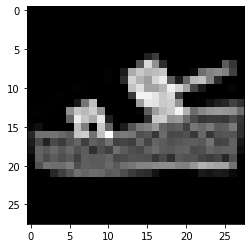

In [10]:
plt.imshow(x_train[12],cmap='gray')

In [11]:
y_train[12]

5

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train,10)

In [14]:
y_test = to_categorical(y_test,10)

In [15]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [19]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [21]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.4517 - accuracy: 0.8348
Epoch 2/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.3032 - accuracy: 0.8877
Epoch 3/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.2582 - accuracy: 0.9035
Epoch 4/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.2256 - accuracy: 0.9150
Epoch 5/10
1875/1875 [==============================] - 130s 70ms/step - loss: 0.1993 - accuracy: 0.9247
Epoch 6/10
1875/1875 [==============================] - 138s 74ms/step - loss: 0.1752 - accuracy: 0.9340
Epoch 7/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.1563 - accuracy: 0.9404
Epoch 8/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.1384 - accuracy: 0.9474
Epoch 9/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.1219 - accuracy: 0.9536
Epoch 10/10
1875/1875 [==============================] 

In [26]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.3726 - accuracy: 0.9008


[0.3725588023662567, 0.9007999897003174]

In [27]:
model.save('Fashion_mnist.h5')